<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/17%EC%9E%A5%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 17 장 순환 신경망 RNN

문장의 학습 : 이전까지 학습했던 내용들과는 다르게 문장은 여러 개의 단어가 **정해진 순서대로 입력**되어야 한다.</br>다시 말해, 과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려해야 하는 문제가 생긴다.

이러한 유기성을 해결하기 위해 **순환 싱경망(Recurrent Neural Network, RNN)** 방법이 고안되었다.

순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때, 앞서 입력받은 데이터를 잠시 기억해 놓는 방법이다.

그리고 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어간다.

## Long Short Term Memory (LSTM)

RNN이 처음 개발된 이후, RNN 결과를 개선하기 위해 발전된 방식들 중 LSTM이 널리 사용되었다.

이는 한 층 안에서 반복을 많이 해야 하는 RNN 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고, 이를 해결하기 어렵다는 단점을 보완한 방법이다.

즉, 반복되기 직전 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가하는 것이다.


RNN 방식의 장점은 입력 값과 출력 값을 어떻게 설정하느냐에 따라 여러 가지 상황에서 적용할 수 있다.

1) 다수 입력 / 단일 출력 : 문장을 읽고 뜻을 파악

2) 단일 입력 / 다수 출력 : 사진 캡션 생성

3) 다수 입력 / 다수 출력 : 문장 번역

## LSTM 을 이용한 로이터 뉴스 카테고리 분류하기

keras에서 load_data()를 통하여 MNIST 데이터셋과 같이 RNN 학습에 적절한 텍스트 대용량 데이터 또한 받을 수 있다.

케라스가 제공하는 '로이터 뉴스 카테고리 분류'와 'IMDB 영화 리뷰'를 통해 RNN을 학습해 볼 것이다.

입력된 문장의 의미를 파악하는 것은 곧 모든 단어를 종합하여 하나의 카테고리로 분류하는 작업이라고 할 수 있다.

예를 들어, "안녕. 오늘 날씨가 참 좋네"라는 말은 '인사'카테고리에 분류해야 한다.

이러한 긴 텍스트를 읽고 이 데이터가 어떤 의미를 지니는지를 카테고리로 분류하는 연습을 할 것이다.

**로이터 뉴스 데이터는, 총 11,258개의 뉴스 기사가 46개의 카테고리로 나누어진 대용량 텍스트 데이터이다.**

In [ ]:
#로이터 뉴스 데이터셋 불러오기
import numpy as np
from keras.datasets import reuters

#데이터 분리

(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=.2)

#데이터 확인
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
#X_train의 모든 기사들의 첫 원소가 1임을 확인할 수 있다.
#아래는 20개의 X_train 데이터들의 10개 원소들을 확인한 것이다.

for i in range(20):
  print(X_train[i][:10])
print(Y_train[:30])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]
[1, 2, 699, 2, 2, 56, 2, 2, 9, 56]
[1, 53, 12, 284, 15, 14, 272, 26, 53, 959]
[1, 4, 686, 867, 558, 4, 37, 38, 309, 2]
[1, 2, 111, 8, 25, 166, 40, 638, 10, 436]
[1, 4, 37, 38, 309, 213, 349, 2, 48, 193]
[1, 56, 2, 925, 149, 8, 16, 23, 931, 2]
[1, 53, 648, 26, 14, 749, 26, 39, 2, 2]
[1, 178, 53, 321, 26, 14, 948, 26, 178, 39]
[1, 56, 2, 81, 40, 2, 174, 2, 6, 2]
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]
[1, 56, 141, 2, 2, 149, 8, 16, 33, 223]
[1, 2, 81, 8, 16, 625, 42, 120, 7, 2]
[1, 248, 409, 166, 2, 2, 2, 8, 4, 495]
[1, 4, 113, 23, 133, 6, 433, 226, 7, 2]
[1, 577, 9, 355, 430, 21, 4, 2, 5, 4]
[1, 945, 65, 111, 8, 10, 498, 40, 85, 2]
[1, 486, 341, 785, 26, 14, 482, 26, 255, 606]
[1, 53, 19, 296, 15, 14, 258, 26, 53, 959]
[1, 2, 851, 260, 542, 159, 13, 52, 29, 23]
[ 3  4  3  4  4  4  4  3  3 16  3  3  4  4 19  8 16  3  3 21 11  4  4  3
  3  1  3  1  3 16]


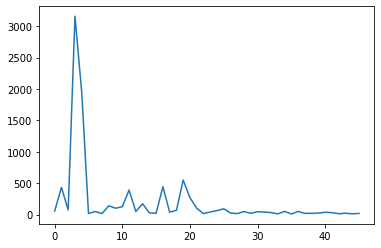

In [ ]:
#히스토그램이 균등하게 나오지 않는 것이 확인된다.
import matplotlib.pyplot as plt
x = np.arange(47)
weight1 = Y_train
hist1, bins = np.histogram(weight1, x)

plt.plot(x[:-1], hist1)
plt.show()

그리고 학습 데이터를 보면 숫자 배열인 것이 확인 되는데 이 숫자는 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙인 것이다.

1, 2, 2, 8, ... 의 1은 아마 'A', 'The' 즘 되지 않을까 싶다. 그렇지만 2가 두 번 연속 나오는 것에 대해서는 중복된 단어라기 보다는 빈도수가 같은 단어라고 생각이 든다.

해당되는 기사를 찾아서 확인해보고자 했지만 찾지 못하였다.

In [ ]:
#모든 기사들의 첫 번 째 단어가 같음을 확인
count = 0
for i in range(8982):
  if(X_train[i][0]!=1):
    count += 1
    print(i)
    print(X_train[i][:10])
  
if(count==0):
  print('Every first word is same')

Every first word is same


X_train 데이터의 모든 기사들의 첫 단어들이 모두 같은 단어임 또한 확인할 수 있다.

기사의 단어들 중 거의 사용되지 않는 것들도 있다.</br>이러한 빈도수가 낮은 모든 데이터들 까지 사용하는 것은 비효율적이므로 빈도가 높은 단어만 불러와 사용하기로 하였다.

이는 num_word=1000 이라는 인자를 통해 빈도가 1~1000에 해당하는 단어만 선택하여 불러오는 것이다.

또한 기사의 단어 수가 상이하므로 데이터 전처리 함수 sequence를 통해 숫자를 맞추어 줄 수 있다.

In [ ]:
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils

#데이터 전처리
#100개 이상은 버리고 / 100개 이하일 때는 모자란 수 만큼 0으로 채운다.
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [ ]:
#모델 설정
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

Embedding 층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할을 한다. </br>
```
Embedding('불러온 단어의 총 개수', '기사당 단어의 수')
```
와 같은 형태로 사용하며, 모델 설정의 맨 처음에 있어야 한다.

아래의 블로그를 보면서 LSTM 의 구조를 조금 더 이해할 수 있었다.
[LSTM 이해하기(개발새발로그)](https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr)

![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F999F603E5ACB86A005)

위 블로그의 설명과 그림을 인용하자면, LSTM의 반복 모듈에는 4개의 상호작용 레이어가 있으며 학습 과정은 가장 중요한 **Cell State**로부터 시작된다.

![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99CB87505ACB86A00F)


블로그의 예시로 모델 이해 - 상황 : 영어 문장의 다음에(마지막에 올 단어) 예측

>Cell State ${C_{t-1}}$ : 이전의 반복 모듈에서 주어에 해당하는 정보가 존재

>Input ${x_{t}}$ : 또 다른 주어가 될 수 있는 단어 

>첫 번 째 Sigmoid ${f_{t}}$ (0 ~ 1): 또 다른 주어가 될 수 있는 ${x_{t}}$ 가 들어왔으므로 ${C_{t-1}}$을 보존할 지 ( sig = 1 ), 버릴 지 ( sig = 0 ) 결정

>두 번 째 Sigmoid ${\sigma}$ (0 ~ 1): 새로 들어온 주어와 다른 단어들 ${x_{t}}$을 어느정도로 기억할 지 결정

>$\tanh$ (-1 ~ +1) : 어떤 단어를 기억(저장)할 지 후보군 $\widetilde{C_{t}}$ 설정

>세 번 째 Sigmoid ${\sigma}$ (0 ~ 1): 새로 업데이트 된 Cell State 함수에 tanh 를 거쳐 어느 부분을 output 으로 내보낼 지 결정

>output 으로 나가는 부분은 아마도 주어 다음에 올 확률이 높은 동사에 높은 가중치를 두었을 것이고 단수형/복수형 또한 포함이 된 정보일 것이다.


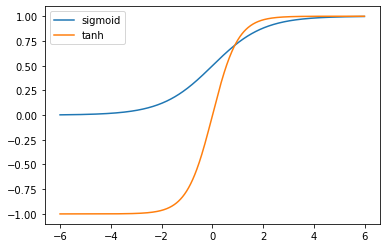

In [ ]:
x = np.arange(-6, 6, 0.02)

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

sig = sigmoid(x)
tanh = np.tanh(x)

plt.plot(x, sig, label='sigmoid')
plt.plot(x, tanh, label='tanh')
plt.legend()
plt.show()

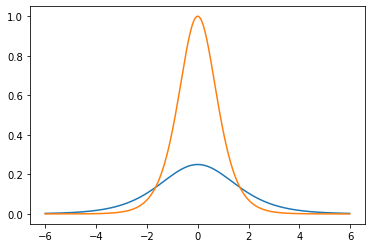

In [ ]:
sig_diff = sig*(1-sig)
tanh_diff = (1+tanh)*(1-tanh)

plt.plot(x, sig_diff, label='sigmoid_diff')
plt.plot(x, tanh_diff, label='tanh_diff')
plt.show()

Sigmoid 함수의 미분값은 최대 0.2 이고 tanh 함수의 미분값은 최대 1.0이다.

이는 오차 역전파 과정에서 모두 기울기 소실 문제를 발생시키지만, tanh 가 미분값의 최댓값이 크기 때문에 sigmoid 함수보다 해당 문제가 덜 발생할 수 있다.

기울기 소실 문제를 해결하기 위해 ReLU 함수가 있지만 이는 0보다 클 때 함수값을 그대로 출력하게 되면서 발산할 수 있기 때문에 LSTM 모델에 대부분 적합하지 않다.

따라서 해당 모델에서도 tanh함수를 사용하게 되었다.

In [ ]:
#모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#모델 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20,
                    validation_data=(x_test, y_test))

```
Epoch 17/20
90/90 [==============================] - 1s 10ms/step - loss: 0.8953 - accuracy: 0.7707 - val_loss: 1.1784 - val_accuracy: 0.6977
Epoch 18/20
90/90 [==============================] - 1s 13ms/step - loss: 0.8560 - accuracy: 0.7807 - val_loss: 1.1920 - val_accuracy: 0.7044
Epoch 19/20
90/90 [==============================] - 1s 11ms/step - loss: 0.8178 - accuracy: 0.7905 - val_loss: 1.1907 - val_accuracy: 0.7097
Epoch 20/20
90/90 [==============================] - 1s 9ms/step - loss: 0.7835 - accuracy: 0.8038 - val_loss: 1.1922 - val_accuracy: 0.7128
```

71/71 [==============================] - 1s 7ms/step - loss: 1.1922 - accuracy: 0.7128

 Test Accuracy: 0.7128


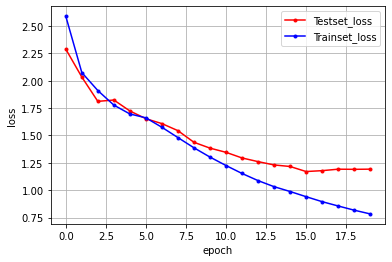

In [ ]:
#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

#테스트셋 오차
y_vloss = history.history['val_loss']

#학습셋 오차
y_loss = history.history['loss']

#그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##LSTM 의 작동

상황 : 문장의 다음에 올 단어를 예측 ( 마지막 단어 예측 )
1. $h_{t-1}$ 과 $x_{t}$를 받아서 **Sigmoid Layer**를 거쳐 0 과 1 사이의 값을 받아 Cell State $C_{t-1}$에 보낸다. 보내진 값이 0이면 이전의 정보를 모두 **'버리고'**, 1이 보내졌다면 모두 **'보존'**하게 된다.
> 현재 주어의 성별 정보를 가지고 있을 수도 있어서 그 성별에 맞는 대명사가 사용되도록 준비하고 있을 수도 있을 것이다. 그런데 새로운 주어가 왔을 때, 우리는 기존 주어의 성별 정보를 생각하고 싶지 않을 것이다.

2. 앞의 과정이 이전에 수행했던 값의 유지를 결정했다면, 이번에는 새로들어온 값들의 업데이트 정도를 결정한다.</br>Input 데이터들을 또 한 번 시그모이드 함수를 거쳐 어떤 값을 업데이트할 지 정한다. </br>그 다음에 tanh layer가 새로운 후보 값들인 $\widetilde{C_{t}}$라는 vector를 만들고, **Cell state**에 더할 준비를 한다. 이렇게 두 단계에서 나온 정보를 합쳐서 state를 업데이트할 재료를 만들게 된다.
> 다시 언어 모델의 예제에서, 기존 주어의 성별을 잊어버리기로 했고, 그 대신 새로운 주어의 성별 정보를 cell state에 더하고 싶을 것이다.

Cell State 의 본체는 Input data 의 tanh 의 값이라는 것 또한 생각할 수 있다.

3. 이전 state에 ${f_{t}}$를 곱해서 가장 첫 단계에서 잊어버리기로 정했던 것들을 진짜로 잊어버린다. 그리고나서 $i_{t} * \widetilde{C_{t}}$를 더한다.

4. 마지막으로 무엇을 output으로 내보낼 지 정하는 일이 남았다. 먼저 또 한 번 sigmoid 함수에 input data 를 넣어 어느 부분을 output 으로 내보낼 지 결정해준다.</br>그리고나서 cell state를 tanh layer에 태워서 -1과 1 사이의 값을 받은 뒤에 방금 전에 계산한 sigmoid gate의 output과 곱해준다. 그렇게 하면 우리가 output으로 보내고자 하는 부분만 내보낼 수 있게 된다.
>우리는 주어를 input으로 받았으므로 주어 다음에 오게 될 예측값인 output으로 적절한 답은 아마도 동사 개념의 무언가가 될 것이다. 예를 들어 최종적인 Output은 앞에서 본 주어가 단수형인지 복수형인지에 따라 그 형태가 달라질 수도 있는 것이다.


# LSTM 과 CNN 조합을 이용한 영화 리뷰 분류

영화와 관련된 정보, 출연진 정보, 개봉 정보, 영화 후기, 평점 등의 데이터가 저장된 IMDB 를 이용할 것이다.

2만 5천여개 의 리뷰가 있으며 긍정/부정의 평가 또한 담겨있다.

로이터 뉴스와 마찬가지로 각 단어에 대한 전처리가 마쳐있고 (**로이터에서는 단어의 빈도를 구해 숫자로 치환**)

여기서도 빈도에 따른 번호가 정해져있다.

또한 클래스가 긍정 또는 부정이라 원-핫 인코딩 과정이 없다. (binary-crossentropy ? )

In [ ]:
#학습셋과 테스트셋 지정
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

In [ ]:
#데이터 전처리
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [ ]:
#모델 설정
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, MaxPooling1D, Dense
from keras.layers import Dropout, LSTM, Embedding, Conv1D

model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 55)                26400     
                                                                 
 dense_3 (Dense)             (None, 1)                 56        
                                                      

```
tf.keras.layers.LSTM(
    units,
    activation="tanh",
    recurrent_activation="sigmoid",
```
LSTM 층의 인자가 unit 밖에 지정이 되지 않았을 때, actiaviton 함수는 'tanh', recurrent_activation 함수를 'sigmoid'가 default 로 지정되어있다.

padding : 입력 데이터의 매트릭스를 감싸는 0으로 채워진 테두리를 하나 만들어주게 되면, 출력값의 매트릭스의 크기가 유지되면서 모든 위치의 데이터를 학습할 수 있다.

```
tf.keras.layers.Conv1D(
    filters,
    kernel_size,
    strides=1,
    padding="valid",
    data_format="channels_last",
    dilation_rate=1,
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

padding: One of "valid", "same" or "causal" (case-insensitive). 

"**valid**" means no padding. 

"**same**" results in padding with zeros evenly to the left/right or up/down of the input such that **output has the same height/width dimension as the input.**

"**causal**" results in causal (dilated) convolutions, e.g. output[t] does not depend on input[t+1:]. Useful when modeling temporal data where the model should not violate the temporal order.

Epoch 1/10
250/250 [==============================] - 18s 63ms/step - loss: 0.0402 - accuracy: 0.9856 - val_loss: 0.7084 - val_accuracy: 0.8384
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 0.0303 - accuracy: 0.9888 - val_loss: 0.6564 - val_accuracy: 0.8436
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0315 - accuracy: 0.9886 - val_loss: 0.7579 - val_accuracy: 0.8357
Epoch 4/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0284 - accuracy: 0.9900 - val_loss: 0.7734 - val_accuracy: 0.8366
Epoch 5/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0304 - accuracy: 0.9893 - val_loss: 0.8130 - val_accuracy: 0.8340
Epoch 6/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0290 - accuracy: 0.9898 - val_loss: 0.7355 - val_accuracy: 0.8402
Epoch 7/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0282 - accuracy: 0.9896 - val_loss: 0.7609 - val_accuracy: 0.839

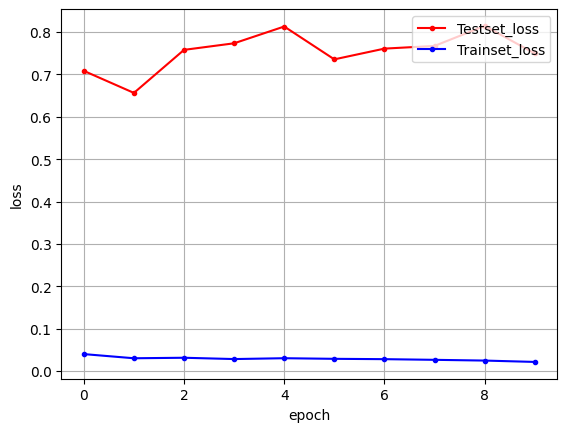

In [ ]:
#컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=100, epochs=10,
                    validation_data=(X_test, Y_test))
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

import matplotlib.pyplot as plt
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#전처리 2
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

#데이터 전처리
X_train2 = sequence.pad_sequences(X_train, maxlen=150)
X_test2 = sequence.pad_sequences(X_test, maxlen=150)

Epoch 1/10
250/250 [==============================] - 12s 48ms/step - loss: 0.0502 - accuracy: 0.9818 - val_loss: 0.6310 - val_accuracy: 0.8441
Epoch 2/10
250/250 [==============================] - 7s 29ms/step - loss: 0.0419 - accuracy: 0.9839 - val_loss: 0.6665 - val_accuracy: 0.8407
Epoch 3/10
250/250 [==============================] - 4s 18ms/step - loss: 0.0328 - accuracy: 0.9891 - val_loss: 0.6895 - val_accuracy: 0.8431
Epoch 4/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0340 - accuracy: 0.9876 - val_loss: 0.7103 - val_accuracy: 0.8387
Epoch 5/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0268 - accuracy: 0.9906 - val_loss: 0.6687 - val_accuracy: 0.8397
Epoch 6/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.7046 - val_accuracy: 0.8364
Epoch 7/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.7434 - val_accuracy: 0.839

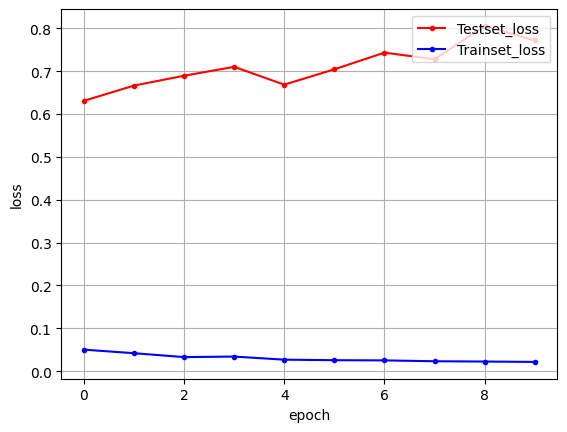

In [ ]:
history = model.fit(X_train2, Y_train, batch_size=100, epochs=10,
                    validation_data=(X_test2, Y_test))
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test2, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

import matplotlib.pyplot as plt
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/10
250/250 [==============================] - 66s 103ms/step - loss: 0.4455 - accuracy: 0.7698 - val_loss: 0.3169 - val_accuracy: 0.8634
Epoch 2/10
250/250 [==============================] - 10s 40ms/step - loss: 0.2727 - accuracy: 0.8877 - val_loss: 0.3173 - val_accuracy: 0.8646
Epoch 3/10
250/250 [==============================] - 4s 16ms/step - loss: 0.2250 - accuracy: 0.9098 - val_loss: 0.3188 - val_accuracy: 0.8617
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 0.1866 - accuracy: 0.9283 - val_loss: 0.3288 - val_accuracy: 0.8614
Epoch 5/10
250/250 [==============================] - 4s 15ms/step - loss: 0.1539 - accuracy: 0.9448 - val_loss: 0.3587 - val_accuracy: 0.8603
Epoch 6/10
250/250 [==============================] - 4s 15ms/step - loss: 0.1202 - accuracy: 0.9576 - val_loss: 0.3987 - val_accuracy: 0.8570
Epoch 7/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0982 - accuracy: 0.9663 - val_loss: 0.4301 - val_accuracy: 0.8

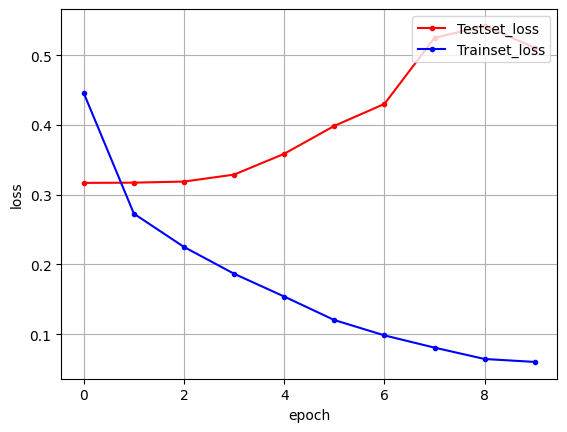

In [ ]:
#Embdding 층 변경
model = Sequential()
model.add(Embedding(5000, 150))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

X_train2 = sequence.pad_sequences(X_train, maxlen=150)
X_test2 = sequence.pad_sequences(X_test, maxlen=150)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model.fit(X_train2, Y_train, batch_size=100, epochs=10,
                    validation_data=(X_test2, Y_test))
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test2, Y_test)[1]))

y_vloss = history2.history['val_loss']
y_loss = history2.history['loss']

x_len = np.arange(len(y_loss))

import matplotlib.pyplot as plt
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#전처리 3
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, MaxPooling1D, Dense
from keras.layers import Dropout, LSTM, Embedding, Conv1D
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

#데이터 전처리
X_train2 = sequence.pad_sequences(X_train, maxlen=150)
X_test2 = sequence.pad_sequences(X_test, maxlen=150)

17464789/17464789 [==============================] - 0s 0us/step


Epoch 1/10
250/250 [==============================] - 43s 104ms/step - loss: 0.4222 - accuracy: 0.7938 - val_loss: 0.3123 - val_accuracy: 0.8674
Epoch 2/10
250/250 [==============================] - 10s 39ms/step - loss: 0.2572 - accuracy: 0.8952 - val_loss: 0.2969 - val_accuracy: 0.8737
Epoch 3/10
250/250 [==============================] - 6s 26ms/step - loss: 0.2117 - accuracy: 0.9178 - val_loss: 0.2965 - val_accuracy: 0.8725
Epoch 4/10
250/250 [==============================] - 5s 22ms/step - loss: 0.1779 - accuracy: 0.9330 - val_loss: 0.3041 - val_accuracy: 0.8762
Epoch 5/10
250/250 [==============================] - 4s 15ms/step - loss: 0.1447 - accuracy: 0.9453 - val_loss: 0.3463 - val_accuracy: 0.8729
Epoch 6/10
250/250 [==============================] - 4s 17ms/step - loss: 0.1153 - accuracy: 0.9596 - val_loss: 0.3965 - val_accuracy: 0.8678
Epoch 7/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0912 - accuracy: 0.9683 - val_loss: 0.4039 - val_accuracy: 0.8

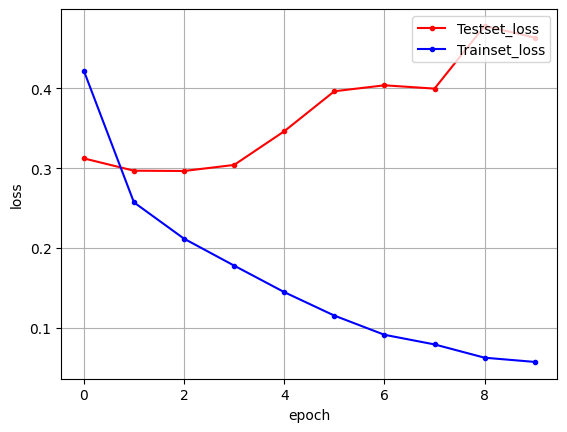

In [ ]:
model = Sequential()
model.add(Embedding(5000, 150))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

X_train2 = sequence.pad_sequences(X_train, maxlen=150)
X_test2 = sequence.pad_sequences(X_test, maxlen=150)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history3 = model.fit(X_train2, Y_train, batch_size=100, epochs=10,
                    validation_data=(X_test2, Y_test))
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test2, Y_test)[1]))

y_vloss = history3.history['val_loss']
y_loss = history3.history['loss']

x_len = np.arange(len(y_loss))

import matplotlib.pyplot as plt
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()